4.1	Cree una señal que sea la suma de tres componentes sinusoidales con frecuencias de 40, 80 y 160 Hz. Defina la frecuencia de muestreo mínima necesaria para representar la señal, y utilice la frecuencia de muestreo necesaria para representarla apropiadamente. 

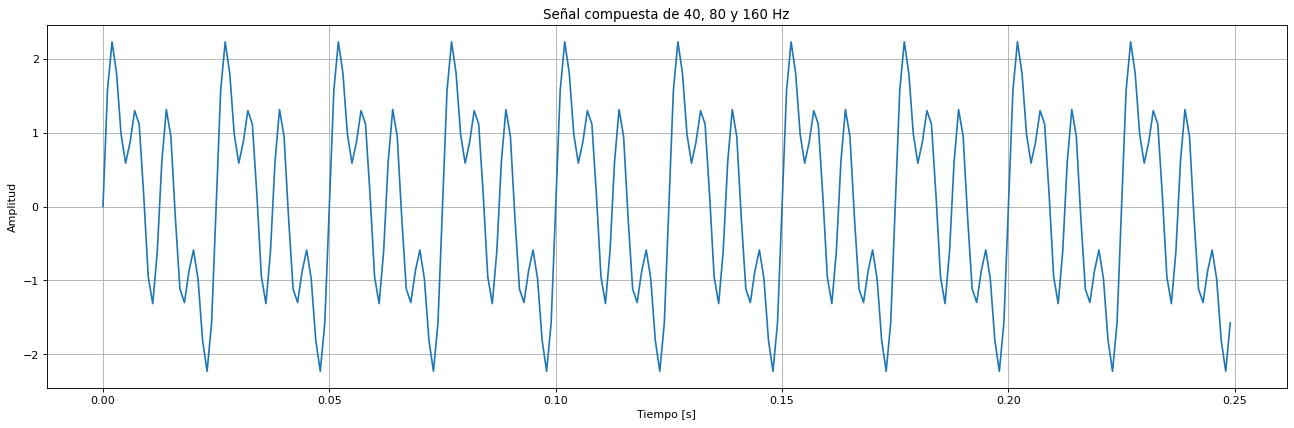

In [ ]:
#  Crear una señal con frecuencias 40, 80 y 160 Hz
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Frecuencias de la señal
f1, f2, f3 = 40, 80, 160
# Frecuencia de muestreo mínima según Nyquist: > 2*160 = 320 Hz. Entre mas alta sea mejor resolución
Fs = 1000
T = 1/Fs
t = np.arange(0, 0.25, T)  # 0.25 s ≈ 10 ciclos de 40 Hz

# Componentes y señal compuesta
x = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) + np.sin(2*np.pi*f3*t)

# Graficar
figure(figsize=(20, 6), dpi=80)
plt.plot(t, x)
plt.title("Señal compuesta de 40, 80 y 160 Hz")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

El teorema de muestreo de Nyquist dice que para poder muestrear adecuadamente una señal sin perder información (evitar aliasing), la frecuencia de muestreo (Fs) debe ser al menos el doble de la frecuencia máxima presente en la señal. Como la frecuancia más alta fue de 160, la frecuancia minima debe ser 320.

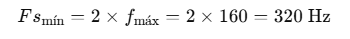

Entre mas alta sea la frecuencia de muestreo mejora la resolucion y evita distorsiones por imprefecciones numéricas o errores por el sistema de adquisición.

4.2	Calcule la transformada de Fourier de la señal y grafique el espectro de frecuencia. Identifique en el espectro las frecuencias que componen la señal (trabaje con 10 periodos de la señal). 

Armónicos detectados:
40.00 Hz
80.00 Hz
160.00 Hz


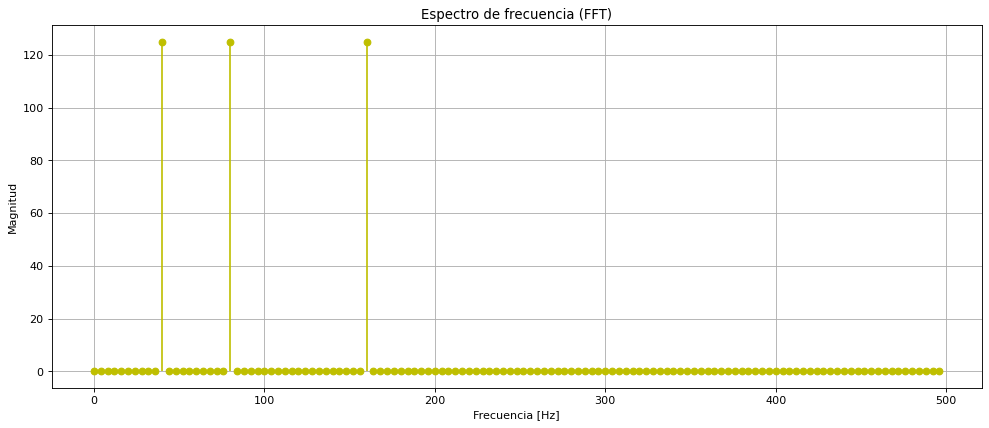

In [37]:
# FFT ya calculada
X = np.fft.fft(x)
N = len(X)
f = np.fft.fftfreq(N, T)

# Parte positiva
X_mag = np.abs(X[:N//2])
f_pos = f[:N//2]

# Umbral de detección (10% del máximo)
umbral = 0.1 * np.max(X_mag)

# Índices donde la magnitud supera el umbral
indices_armonicos = np.where(X_mag > umbral)[0]
frecuencias_armonicos = f_pos[indices_armonicos]

# Mostrar frecuencias
print("Armónicos detectados:")
for f_arm in frecuencias_armonicos:
    print(f"{f_arm:.2f} Hz")

# Gráfico del espectro
plt.figure(figsize=(15, 6), dpi=80)
plt.stem(f_pos, X_mag, linefmt='y', markerfmt='yo', basefmt=" ")
plt.title("Espectro de frecuencia (FFT)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.grid()
plt.show()

Cuando aplicamos np.fft.fft(x), obtenemos una secuencia de valores complejos que corresponden a frecuencias normalizadas o "indexadas", no directamente en Hz. Estas frecuencias van desde 0 hasta la frecuencia de Nyquist:

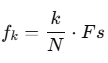

k: es el índice de la frecuencia (posición en el vector).

𝑁: es el número total de muestras.

𝐹s: es la frecuencia de muestreo.


f = np.fft.fftfreq(N, d=1/Fs) a medida que vamos aumentando la frecuencia de muestreo si aumenta la resolucion (como se concluyó en el punto anterior) pero tambien los armonicos se empiezan a aglomerar a la izquierda, eso debido a que se empieza a dividir por un numero cada vez mas grande (d=1/Fs) Entonces, aunque los índices donde ocurren los picos en la FFT no cambian, su correspondencia en Hz sí se expande hacia frecuencias más altas cuando se disminuye Fs, y se contare hacia la izquierda cuando se aumenta Fs.

es así que cuando Fs se incrementa mucho, la frecuencia de Nyquist también aumenta, y como la señal original tiene componentes fijas (40, 80, 160 Hz), esos picos quedan visualmente más pegados hacia la izquierda, porque el eje de frecuencias reales ahora abarca un rango más amplio.

4.3	Consulte la función que permite realizar el cálculo de la transformada inversa de Fourier. Aplíquelo a la señal anterior.

La transformada inversa de Fourier en el contexto del análisis digital permite reconstruir una señal temporal original a partir de su representación en frecuencia. En Python, la operación se realiza mediante la función np.fft.ifft, que corresponde a la Inverse Fast Fourier Transform (IFFT), y es complementaria a np.fft.fft, la cual calcula la transformada rápida de Fourier. La IFFT toma como entrada los coeficientes espectrales complejos obtenidos mediante la FFT y devuelve la señal original en el dominio del tiempo, siempre y cuando no se haya perdido información en el paso anterior (por ejemplo, por filtrado o truncamiento espectral).

En este punto, se aplicó la función np.fft.ifft a la señal compuesta por las frecuencias de 40 Hz, 80 Hz y 160 Hz, previamente transformada con np.fft.fft. Al graficar el resultado de la IFFT, se obtuvo una señal que coincide con la original, lo cual confirma que la transformada inversa reconstruye adecuadamente la señal si se conserva toda la información del espectro. Esta validación es coherente con las propiedades teóricas de la transformada de Fourier, que garantizan una transformación reversible entre los dominios temporal y frecuencial.

El uso de la IFFT se usa en aplicaciones de procesamiento digital de señales (DSP), incluyendo compresión, filtrado espectral y síntesis de señales biomédicas, como se discute ampliamente en la literatura técnica actual, la FFT e IFFT son herramientas esenciales para el análisis y reconstrucción de señales EEG en plataformas de bajo consumo computacional[1] .

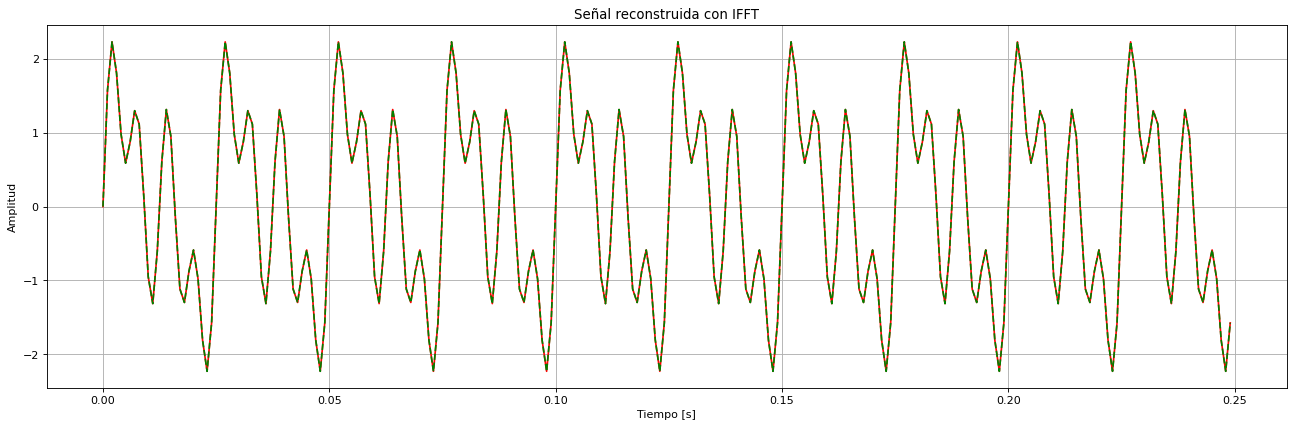

In [ ]:
# Punto 4.3 Transformada inversa de Fourier
x_ifft = np.fft.ifft(X) #X = np.fft.fft(x)
figure(figsize=(20, 6), dpi=80)
plt.plot(t,x,'r')
plt.plot(t, np.real(x_ifft),'--g')
plt.title("Señal reconstruida con IFFT")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

4.4	¿Podría decir que las siguientes líneas aplican un filtro? ¿Por qué? 
F1 = np.fft.fft(x);     //Calcula la transformada de Fourier de la señal x. El resultado F1 es un arreglo de números complejos que representa las componentes espectrales (frecuencias y fases) de la señal
F2 = np.zeros((len(F1))); // Crea un nuevo vector F2 lleno de ceros, del mismo tamaño que F1.
F2[9:13] = F1[9:13];   //Copia un rango específico de frecuencias (índices 9 a 12) desde F1 a F2. Esto actúa como un filtro pasa banda, ya que solo deja pasar las componentes contenidas entre esas posiciones, y anula el resto del espectro. Una seleciión exacta se basa en la frecuancia de muestreo y del numero de muestras
xr = np.fft.ifft(F2); // Aplica la transformada inversa de Fourier (IFFT) sobre el espectro filtrado F2, obteniendo xr, una señal reconstruida en el tiempo que contiene solo las frecuencias seleccionadas.

Esta parte grafica
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, np.real(xr))
ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)');
plt.show()


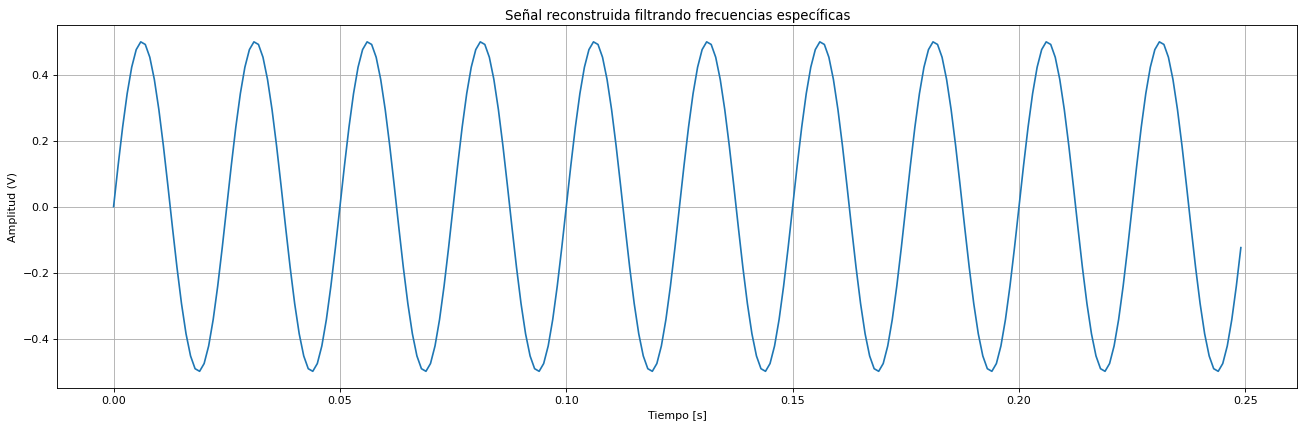

In [ ]:
# Punto 4: Aplicación de filtro pasa banda en la frecuencia deseada
F1 = np.fft.fft(x)
F2 = np.zeros(len(F1), dtype=complex) #dtype=complex asegura que F2 puede contener los datos complejos de F1 sin errores.
F2[9:13] = F1[9:13]
xr = np.fft.ifft(F2)

figure(figsize=(20, 6), dpi=80)
plt.plot(t, np.real(xr))
plt.title("Señal reconstruida filtrando frecuencias específicas")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud (V)")
plt.grid()
plt.show()

Extracción de las componentes de la señal 

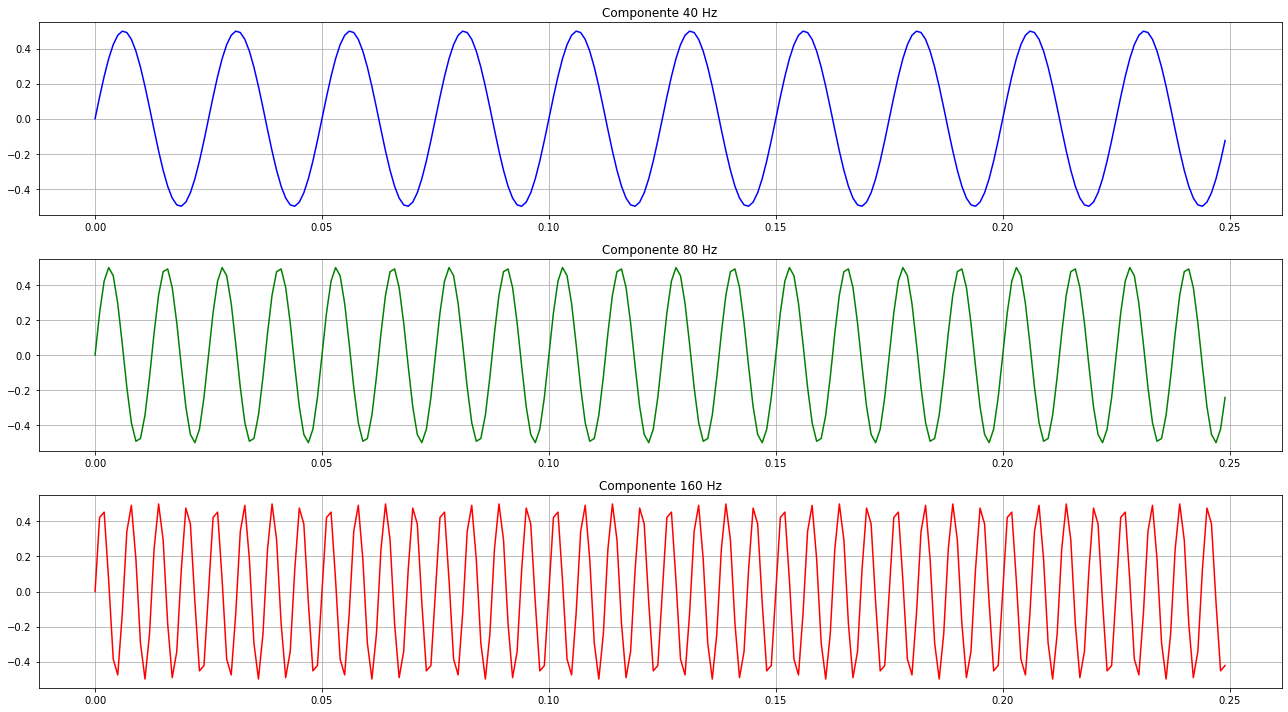

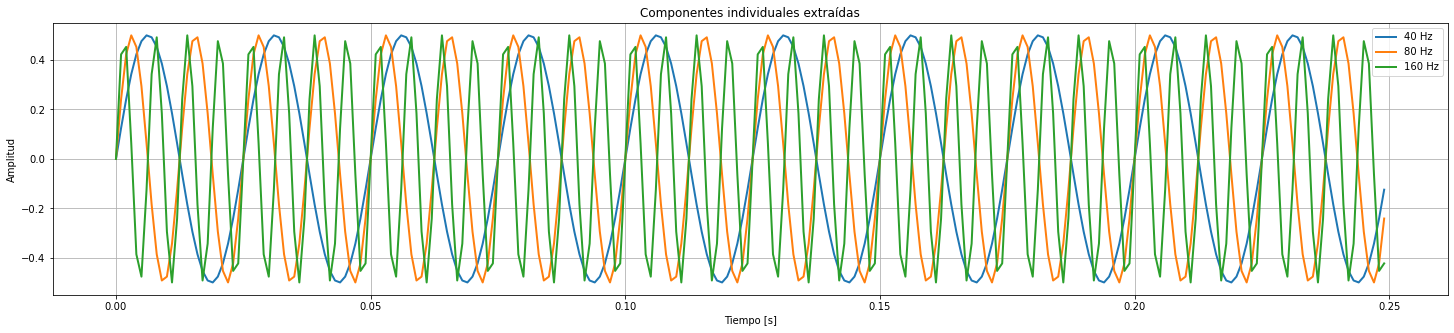

In [53]:
N = len(F1)

# Función para extraer una componente
def extraer_componente(X, idx_central, ancho=4):
    F = np.zeros(len(X), dtype=complex)
    F[idx_central-ancho//2:idx_central+ancho//2] = X[idx_central-ancho//2:idx_central+ancho//2]
    return np.fft.ifft(F)

# Índices aproximados de las frecuencias 40, 80 y 160 Hz
# f = k * Fs / N => k = f * N / Fs
idx_40 = int(40 * N / Fs)
idx_80 = int(80 * N / Fs)
idx_160 = int(160 * N / Fs)

# Extraer cada componente
comp_40 = extraer_componente(F1, idx_40)
comp_80 = extraer_componente(F1, idx_80)
comp_160 = extraer_componente(F1, idx_160)

# Graficar individualmente
plt.figure(figsize=(18, 10))

plt.subplot(3, 1, 1)
plt.plot(t, np.real(comp_40), color='b')
plt.title("Componente 40 Hz")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t, np.real(comp_80), color='g')
plt.title("Componente 80 Hz")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t, np.real(comp_160), color='r')
plt.title("Componente 160 Hz")
plt.grid()

plt.tight_layout()
plt.show()

# Graficar las tres componentes superpuestas
plt.figure(figsize=(25, 5))
plt.plot(t, np.real(comp_40), label='40 Hz', linewidth=2)
plt.plot(t, np.real(comp_80), label='80 Hz', linewidth=2)
plt.plot(t, np.real(comp_160), label='160 Hz', linewidth=2)
plt.title("Componentes individuales extraídas")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.show()

4.5	El archivo adjunto (senecg.mat) contiene una señal de ECG adquirida a una frecuencia de muestreo de 250 Hz. Realice un análisis en frecuencia de la señal usando periodogramas de Welch y determine si es necesario eliminar ruido, en tal caso, elimínelo de la forma que se mostró antes y compruebe que lo haya realizado, calcule la transformada inversa de Fourier de la señal filtrada y compruebe con el periodograma. (Usar una ventana Hanning, y justificar la elección del solapamiento y el ancho de la ventaja) 

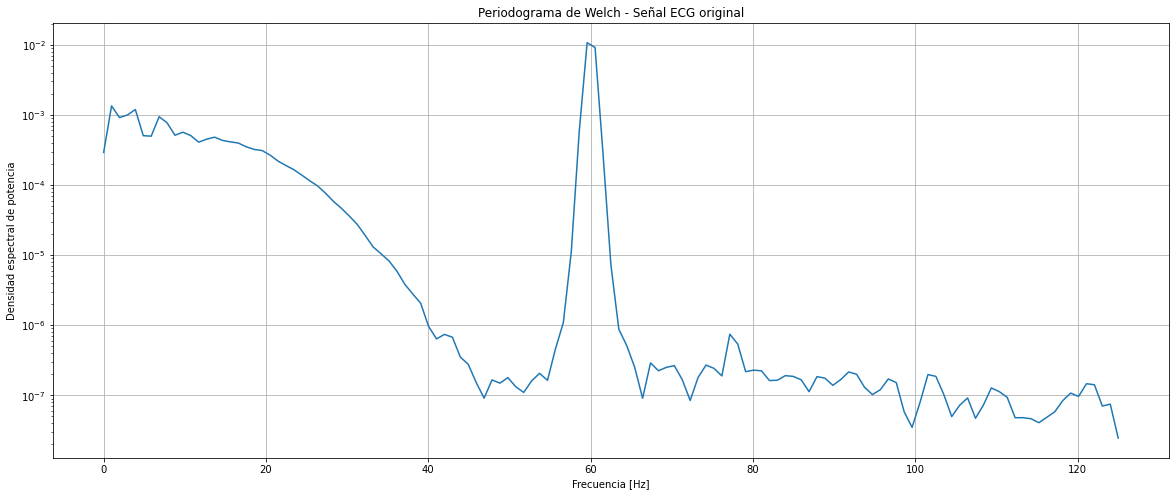

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import welch, hann

# Cargar señal ECG
mat = loadmat("senecg.mat")
ecg = mat['ECG'].flatten()
Fs = 250  # Hz, según enunciado

# Análisis de frecuencia usando Welch (antes del filtrado)
ventana = hann(256)  # Ventana Hanning de 256 muestras (~1s)
noverlap = 128        # 50% de solapamiento

f_pre, Pxx_pre = welch(ecg, fs=Fs, window=ventana, nperseg=256, noverlap=noverlap)

plt.figure(figsize=(20, 8))
plt.semilogy(f_pre, Pxx_pre)
plt.title("Periodograma de Welch - Señal ECG original")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Densidad espectral de potencia")
plt.grid()
plt.show()

Generalmente el ECG debe estar en el rango de 0.5 a 40 Hz. Como el espectro muestra potencia significativa en frecuencias por encima de 50 Hz, hay ruido de alta frecuencia, pueden ser artefactos musculares o interferencia eléctrica. Por lo tanto se porcede a eliminarlo

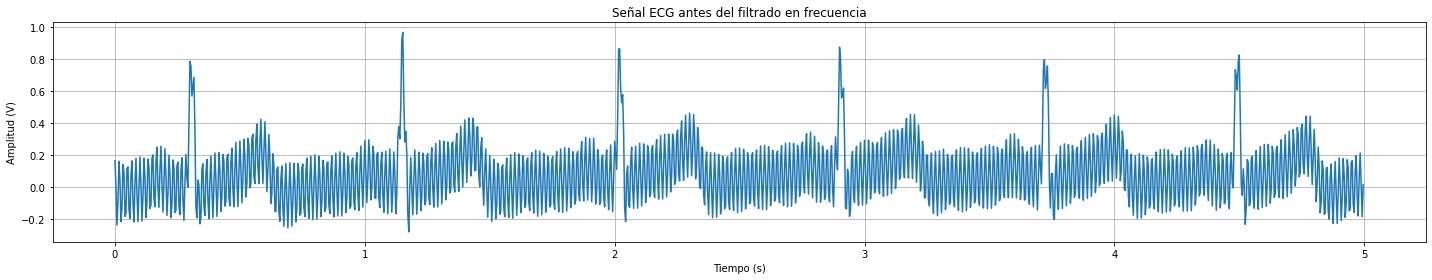

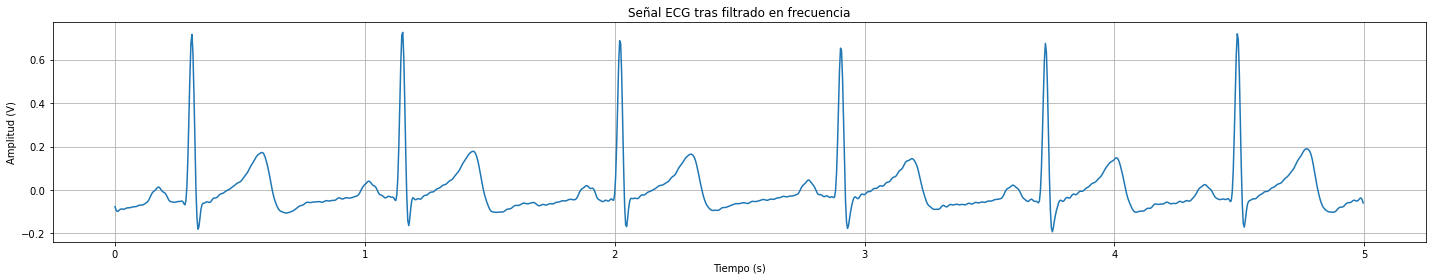

In [74]:
# Señal antes del filtrado
t = np.arange(N) / Fs
plt.figure(figsize=(20, 4))
plt.plot(t, ecg, label='Señal filtrada (IFFT)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.title('Señal ECG antes del filtrado en frecuencia')
plt.grid()
plt.tight_layout()
plt.show()

# Transformada rápida de Fourier
F1 = np.fft.fft(ecg)

# Crear vector de frecuencias asociadas a los índices
freqs = np.fft.fftfreq(N, d=1/Fs)

# Filtrado: mantener solo las frecuencias fisiológicas (0.5–40 Hz aprox.)
F2 = np.zeros_like(F1, dtype=complex)
mask = (np.abs(freqs) > 0.5) & (np.abs(freqs) < 40)  # mantener solo estas
F2[mask] = F1[mask]

# Transformada inversa
xr = np.fft.ifft(F2)

# Señal filtrada en el dominio temporal
plt.figure(figsize=(20, 4))
plt.plot(t, np.real(xr), label='Señal filtrada (IFFT)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.title('Señal ECG tras filtrado en frecuencia')
plt.grid()
plt.tight_layout()
plt.show()

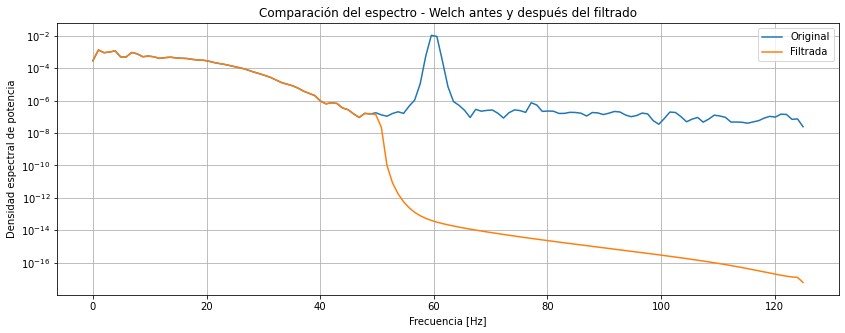

In [ ]:
#  FFT y filtrado: eliminar frecuencias > 50 Hz
N = len(ecg)
Ecg_fft = np.fft.fft(ecg)
f_fft = np.fft.fftfreq(N, d=1/Fs)

# Filtro pasa bajos: eliminar > 50 Hz (y < -50 Hz)
Ecg_fft_filtrada = Ecg_fft.copy()
Ecg_fft_filtrada[np.abs(f_fft) > 50] = 0

#  Reconstrucción con IFFT
ecg_filtrada = np.fft.ifft(Ecg_fft_filtrada)
ecg_filtrada = np.real(ecg_filtrada)  # quitar parte imaginaria

#  Welch posterior al filtrado
f_post, Pxx_post = welch(ecg_filtrada, fs=Fs, window=ventana, nperseg=256, noverlap=noverlap)

# Comparar espectros
plt.figure(figsize=(14, 5))
plt.semilogy(f_pre, Pxx_pre, label="Original")
plt.semilogy(f_post, Pxx_post, label="Filtrada")
plt.title("Comparación del espectro - Welch antes y después del filtrado")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Densidad espectral de potencia")
plt.legend()
plt.grid()
plt.show()

Para realizar el análisis espectral de la señal de ECG, se empleó el método de Welch utilizando una ventana de tipo Hanning con un tamaño de 256 muestras (~1 segundo, dada la frecuencia de muestreo de 250 Hz) y un solapamiento del 50%. La elección de la ventana Hanning responde a su capacidad para reducir las fugas espectrales en señales no periódicas, como las fisiológicas, gracias a su forma suavizada que minimiza las discontinuidades en los extremos de cada segmento. El ancho de la ventana se seleccionó para asegurar que se capturaran múltiples ciclos del ECG sin sacrificar la resolución en frecuencia, mientras que el solapamiento busca suavizar las transiciones entre segmentos y mejorar la estabilidad del promedio espectral [1]. Al observar el periodograma de Welch de la señal original, se identificó un pico prominente cercano a los 60 Hz, atribuible muy posiblemente al ruido de la red eléctrica. Para mitigar este artefacto sin eliminar información útil de la señal, se aplicó un filtrado en el dominio de Fourier, eliminando las frecuencias por encima de 50 Hz. Posteriormente, se aplicó la transformada inversa de Fourier (IFFT) para reconstruir la señal filtrada. Al comparar los periodogramas antes y después del filtrado, se evidenció una atenuación efectiva del componente de 60 Hz, lo que valida el procedimiento como adecuado para reducir el ruido sin comprometer significativamente el contenido fisiológico relevante del ECG[2].

El ancho de ventana (nperseg) es el número de muestras que se usan en cada segmento para calcular el espectro. Una ventana de n muestras se multiplica por la señal en n puntos para suavizar los bordes del segmento para luego calcular la FFT de cada segmento y se promedia. Si el ancho de ventana es pequeño da uns mayor resolución temporal (mejor para señales transitorias o no estacionarias) pero, muy baja resolución en frecuencia y se corre el riesgo de dejar afuera componentes estrechas (como lineas el 60 Hz). Si por el contrario el Ancho de ventana es muy grande esto da una excelente resolución en frecuencia peor resolución temporal pues no se detectan bien los cambios rápidos o eventos transitorios y si la señal no es estacionaria, promedia mal[4].

Para un solapamiento muy bajo habría menos segmentos lo que se traduce en computación más rápida pero, mayor varianza en la estimación del espectro por ende más "ruido" en el gráfico y un solapamiento alto (50–75%) aumenta el número de segmentos promediados, reduce el ruido en el espectro y es muy usado en señales fisiológicas (donde interesa suavidad y buena estimación)[4].



4.6	Realice un análisis de frecuencia a través del periodograma de welch de una señal de EEG de un paciente Sano y otra de un paciente con Parkinson de algún canal que en el proyecto 1 hayan identificado que presentaba diferencias, si no encontró diferencias, elija un par al azar. Realice un análisis comparativo de las señales según lo que le indiquen los periodogramas. 

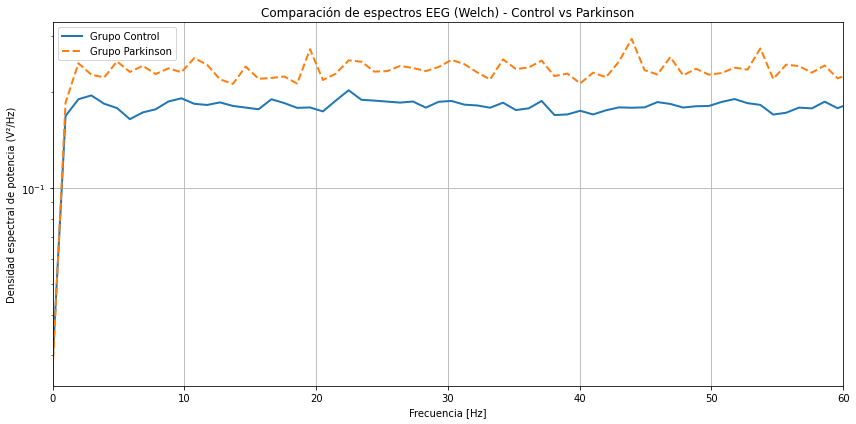

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, hann
from scipy.io import loadmat
import glob

#  Rutas
ruta_control = "./control/*.mat"
ruta_parkinson = "./parkinson/*.mat"
fs = 250  # Frecuencia de muestreo (Hz)

# Función para calcular espectro promedio de un grupo
def promedio_espectros(ruta_archivos):
    espectros = []
    for archivo in glob.glob(ruta_archivos):
        datos = loadmat(archivo)
        # Asumimos que la señal está bajo una clave única
        for clave in datos:
            if not clave.startswith("__"):
                señal = datos[clave].flatten()
                ventana = hann(256)
                f, Pxx = welch(señal, fs=fs, window=ventana, nperseg=256, noverlap=128)
                espectros.append(Pxx)
                break  # solo toma la primera señal del archivo
    espectros = np.array(espectros)
    Pxx_prom = np.mean(espectros, axis=0)
    return f, Pxx_prom

#  Cálculo de espectros promedio
f_control, Pxx_control = promedio_espectros(ruta_control)
f_park, Pxx_park = promedio_espectros(ruta_parkinson)

# Gráfica de comparación
plt.figure(figsize=(12, 6))
plt.semilogy(f_control, Pxx_control, label="Grupo Control", linewidth=2)
plt.semilogy(f_park, Pxx_park, label="Grupo Parkinson", linewidth=2, linestyle="--")
plt.title("Comparación de espectros EEG (Welch) - Control vs Parkinson")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Densidad espectral de potencia (V²/Hz)")
plt.xlim(0, 60)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Para el análisis espectral de señales EEG de pacientes sanos y con Parkinson, se utilizó el método de Welch, el cual consiste en dividir la señal en segmentos superpuestos, aplicar una ventana de ponderación a cada segmento (en este caso, Hanning) y luego promediar los periodogramas individuales. Este enfoque mejora la estabilidad del estimador espectral al reducir su varianza, lo cual es especialmente importante en señales biológicas ruidosas como el EEG [4].

Se utilizó una ventana Hanning de 256 muestras, correspondiente a aproximadamente un segundo de señal (a 250 Hz), para lograr una buena resolución en frecuencia sin perder capacidad de detección de cambios lentos. Este tamaño permite capturar adecuadamente las bandas clásicas del EEG (δ, θ, α, β y γ). Además, se aplicó un solapamiento del 50% (128 muestras) entre segmentos, lo cual permite aumentar el número de promedios y reducir aún más la varianza sin comprometer significativamente la independencia estadística entre segmentos [4].

La validez estadística de esta elección ha sido respaldada por estudios, que demostraron que el uso de ventanas suavizadas como Hanning, junto con solapamientos moderados, mejora la distribución de probabilidad de las estimaciones espectrales basadas en Welch, acercándolas a distribuciones normales estables y precisas [4].



Referencia IEEE

[1] M. P. Praveen, M. S. Bhargavi, and P. K. Meher, “Low-Power and Area-Efficient FFT–IFFT Architecture for Biomedical Signal Processing,” IEEE Transactions on Biomedical Circuits and Systems, vol. 17, no. 1, pp. 112–123, Feb. 2023. DOI: 10.1109/TBCAS.2022.3203482

[2]A. V. Oppenheim, R. W. Schafer, and J. R. Buck, Discrete-Time Signal Processing, 3rd ed., Prentice Hall, 2010.

[3] P. Welch, “The use of fast Fourier transform for the estimation of power spectra: A method based on time averaging over short, modified periodograms,” IEEE Transactions on Audio and Electroacoustics, vol. 15, no. 2, pp. 70–73, Jun. 1967. DOI: 10.1109/TAU.1967.1161901

[4] P. E. Johnson and D. G. Long, “The Probability Density of Spectral Estimates Based on Modified Periodogram Averages,” IEEE Transactions on Signal Processing, vol. 47, no. 5, pp. 1255–1261, May 1999. DOI: 10.1109/78.761719